In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
train_df = pd.read_csv("../data/processed/train_processed.csv")
test_df = pd.read_csv("../data/processed/test_processed.csv")

print("Train shape:", train_df.shape, " Test shape:", test_df.shape)

target = "health_status"
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]

Train shape: (8000, 16)  Test shape: (2000, 16)


In [3]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

In [4]:
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = acc
    
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


🔹 Training Logistic Regression...
Accuracy: 0.9655
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1904
           1       0.69      0.47      0.56        93
           2       1.00      0.33      0.50         3

    accuracy                           0.97      2000
   macro avg       0.89      0.60      0.68      2000
weighted avg       0.96      0.97      0.96      2000


🔹 Training Decision Tree...
Accuracy: 0.9985
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1904
           1       0.98      0.99      0.98        93
           2       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000


🔹 Training Random Forest...


Accuracy: 0.9975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1904
           1       0.96      0.99      0.97        93
           2       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000


🔹 Training Gradient Boosting...


Accuracy: 0.9975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1904
           1       0.96      0.99      0.97        93
           2       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000


🔹 Training SVM...


/home/Dhananjana/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/Dhananjana/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/Dhananjana/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

Accuracy: 0.9770
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1904
           1       0.91      0.57      0.70        93
           2       0.00      0.00      0.00         3

    accuracy                           0.98      2000
   macro avg       0.63      0.52      0.56      2000
weighted avg       0.97      0.98      0.97      2000


🔹 Training XGBoost...


Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1904
           1       0.96      1.00      0.98        93
           2       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000



/tmp/ipykernel_170116/140339590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="Accuracy", data=results_df, palette="viridis")


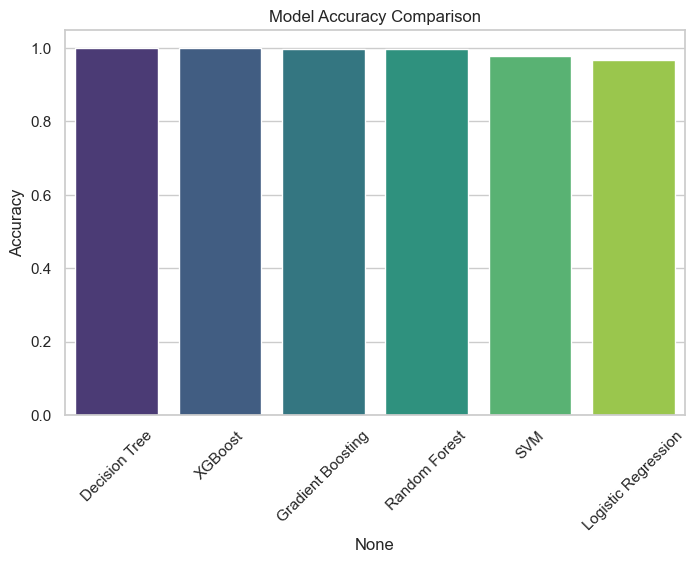


✅ Best Model: Decision Tree


In [ ]:
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y="Accuracy", data=results_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()

print("\nBest Model:", results_df.index[0])

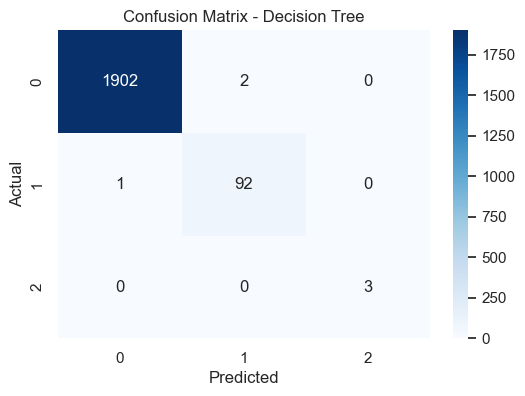

In [6]:
best_model_name = results_df.index[0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [7]:
if len(np.unique(y_test)) == 2:
    y_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {best_model_name}")
    plt.legend()
    plt.show()